In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os

import seaborn as sns
sns.set()

In [45]:
style.use('seaborn-notebook')

In [11]:
data = pd.read_csv('final_data_t.csv').drop('Unnamed: 0', axis =1)

In [12]:
data.head(1)

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay
0,Air Algerie,AH,departure,NaN,landed,DAH2015,2015,1,D16,BCN,2019-07-24 20:05:00,0.0,ALG,2019-07-24 20:25:00,0.0


### Visualizing the relation between my numerical random variables

In [124]:
data['depart_terminal'].values

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '2', '1', '1', '1', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '1', '1',
       '1', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1',
       '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1',
       '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

## Ploting the frequency of the delays in minutes

In [105]:
df_delays = data[['depart_delay', 'arri_delay']]

In [106]:
df_delays =  df_delays[np.logical_and(df_delays['depart_delay']>0, df_delays['arri_delay']>0)]

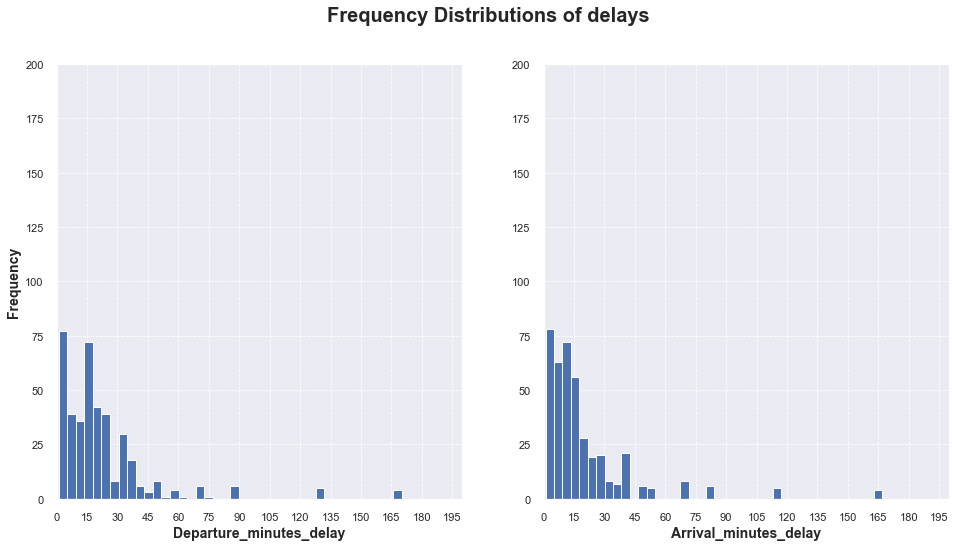

In [108]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of delays', fontweight = 900, fontsize = 20)

ax1.hist(df_delays.depart_delay,bins=40)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)
ax1.set_xlim([0, 200])
ax1.set_ylim([0, 200])
ax1.set_xticks(np.arange(0, 200,15))

ax2.hist(df_delays.arri_delay, bins=40)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
ax2.set_xlim([0, 200])
ax2.set_ylim([0, 200])
ax2.set_xticks(np.arange(0, 200,15))

plt.show()

### Plotting the summary statistics of the delay variable

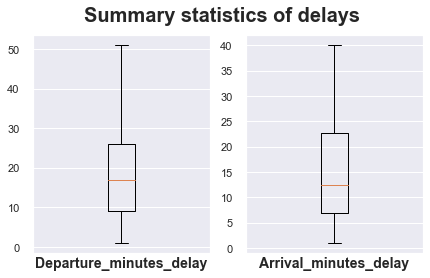

In [121]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[7,4])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Summary statistics of delays', fontweight = 900, fontsize = 20)

ax1.boxplot(df_delays.depart_delay, bootstrap=10000, meanline = True,showfliers=False)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_xticks([])

ax2.boxplot(df_delays.arri_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.set_xticks([])

plt.show()